The Fractional Friedmann Equation:
 
$$ {}^{C}D^{\alpha}_{t}a(t) = \tau_{0}^{\alpha-1} H_{0} \left[\sum_{i}\Omega_{i}\left(\frac{a_{0}}{a(t)}\right)^{3(1+w_{i})}\right]^{1/2} a(t) $$
 
where:
- $0 < \alpha \leq 1$ is the fractional order
- $\tau_0$ is a characteristic time scale (typically $1/H_0$)
- $\Omega_i$ are density parameters for different components (matter, dark energy, radiation)
- $w_i$ are equation of state parameters
Gaussian Initial Conditions
$$ a(t) = a_0 \exp\left(-\frac{(t-t_0)^2}{2\sigma^2}\right) $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import gamma

In [2]:
# Cosmological density parameters
Omega_m = 0.315
Omega_r = 9.2e-5
Omega_L = 1 - Omega_m - Omega_r

def F(a):
    return np.sqrt(
        Omega_m * a**(-3) +
        Omega_L +
        Omega_r * a**(-4)
    )

def f(a):
    return F(a) * a

In [3]:
def fractional_friedmann_forward_euler(
    alpha=1.0,
    T=1.0,
    N=2000,
    a0=1e-6,
    gaussian_sigma=0.0
):

    dt = T / N
    t = np.linspace(0, T, N+1)
    a = np.zeros(N+1)

    # Proper Gaussian perturbation of the initial condition
    if gaussian_sigma > 0:
        a[0] = a0 * (1 + gaussian_sigma * np.random.randn())
    else:
        a[0] = a0

    gamma_alpha1 = gamma(alpha + 1)

    for n in range(N):
        sum_term = 0.0

        for j in range(n + 1):
            weight = (
                (n + 1 - j)**alpha
                - (n - j)**alpha
            ) / gamma_alpha1

            sum_term += weight * f(a[j])

        a[n + 1] = a0 + (dt**alpha) * sum_term

        if a[n + 1] <= 0:
            a[n + 1] = np.nan
            break

    return t, a


In [4]:
t, a = fractional_friedmann_forward_euler(
    alpha=1,T=1,N=5000,a0=1e-6,gaussian_sigma=0.1)

In [9]:
aT = a[-1]
a_normalized = a / aT

<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
C:\Users\VivoBook\AppData\Local\Temp\ipykernel_13136\2853284494.py:7: SyntaxWarning: invalid escape sequence '\ '
  plt.title("Fractional Friedmann Equation\n$ a(0)=10^{-6},\ a(1)=1 $")


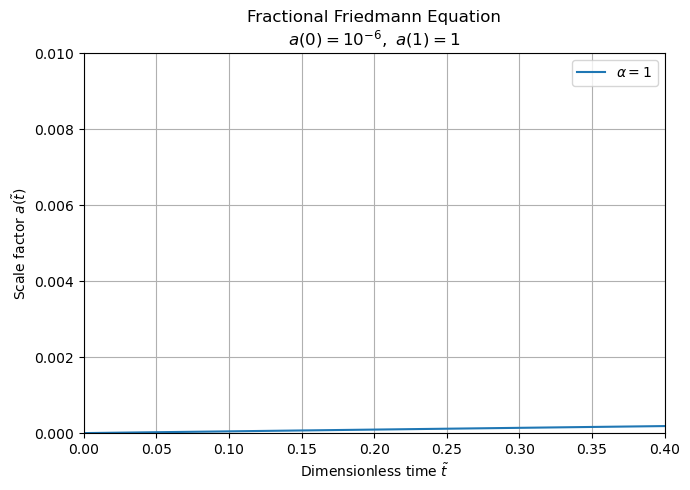

In [15]:
plt.figure(figsize=(7,5))
plt.plot(a_normalized,t , label=rf"$\alpha={1}$")
plt.xlim(0,0.4)
plt.ylim(0,0.01)
plt.xlabel(r"Dimensionless time $\tilde{t}$")
plt.ylabel(r"Scale factor $a(\tilde{t})$")
plt.title("Fractional Friedmann Equation\n$ a(0)=10^{-6},\ a(1)=1 $")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
